# Verification of 1D diffusion

In 1D, the Cleary and Adrian (1973) solution for the diffusion problem is the following:

$$\begin{align}
C(x,t) = C_i 
+ (C_0 - C_i) A(x,t)
\end{align}$$

$$
\begin{aligned}
A(x,t) ={}& 
\frac{1}{2}\,
\operatorname{erfc}\!\left(
    \frac{R x - v t}{2\sqrt{D R t}}
\right)
+ \frac{1}{2}\,
\exp\!\left(\frac{v x}{D}\right)
\operatorname{erfc}\!\left(
    \frac{R x + v t}{2\sqrt{D R t}}
\right)
\\[6pt]
&+ 
\frac{1}{2}
\left[
    2 
    + \frac{v(2L - x)}{D}
    + \frac{v^{2} t}{D R}
\right]
\exp\!\left(\frac{v L}{D}\right)
\operatorname{erfc}\!\left(
    \frac{R(2L - x) + v t}{2\sqrt{D R t}}
\right)
\\[6pt]
&\quad
- \left(\frac{v^{2} t}{\pi D R}\right)^{1/2}
\exp\!\left[
    \frac{v L}{D}
    - \frac{R}{4 D t}\,(2L - x + \tfrac{v t}{R})^{2}
\right]
\end{aligned}
$$

Where: <br>
$C_i=$ Homogeneous initial concentration <br>
$C_0=$ Boundary concentration <br>
$x=$ Position <br>
$v=$ gas seepage <br>
$D=$ Diffusion coefficient <br>
$t=$ Time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from frake import GraphFunctions as gf
from scipy.special import erfc
import seaborn as sns

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
# load csv data from Paraview
from frake import FileFunctions as ff
from frake import ModifierFunctioins as mf
import os

In [15]:


#get relative path this file path
myPath = os.getcwd() 
print(myPath)

#get a a folder above a path
path_above= os.path.dirname(myPath)
print(path_above)

#complete path to data folder
myPath = os.path.join(path_above, 'output')
print(myPath)


ADSIM_DATA, IDs, _= ff.OpenFromFolder(Path=myPath, filetype='csv')

mf.DataOperation(ADSIM_DATA, '-', 'arc_length', 1, 'arc_length')
mf.DataOperation(ADSIM_DATA, '*', 'arc_length', -1, 'arc_length')

ADSIM_DATA[0].head()

c:\Users\zamcr\Dcuments\GitHub\ADSIM\src\test
c:\Users\zamcr\Dcuments\GitHub\ADSIM\src
c:\Users\zamcr\Dcuments\GitHub\ADSIM\src\output


,Absolute_Pressure,CO2_Concentration,CO2_Concentration_Rate,CaCO3_Concentration,Degree_of_Carbonation,Gas_Seepage_Velocity:0,Gas_Seepage_Velocity:1,Gas_Seepage_Velocity:2,Lime_Concentration,Reaction_Rate,Temperature,Temperature_Rate,Total_Concentration,Volumetric_Binder_Content,vtkValidPointMask,arc_length,Points:0,Points:1,Points:2
0,79282,32.0,0,0,0,0,0,0,0,0,298,0,32.0,0,1,1.000,0,0.000,0
1,79282,32.0,0,0,0,0,0,0,0,0,298,0,32.0,0,1,0.999,0,0.001,0
2,79282,32.0,0,0,0,0,0,0,0,0,298,0,32.0,0,1,0.998,0,0.002,0
3,79282,32.0,0,0,0,0,0,0,0,0,298,0,32.0,0,1,0.997,0,0.003,0
4,79282,32.0,0,0,0,0,0,0,0,0,298,0,32.0,0,1,0.996,0,0.004,0


# Use consolitation thery to check diffusion only

Analytical solution is given by:

$$
\begin{align}
C(x, t)= C_i + (C_0 - C_i) \sum_{n=0}^{\infty} \cfrac{2}{M} \sin \left( \cfrac{M x}{2 L}  \right) \exp \left(-\cfrac{M^2 D t }{4 L^2} \right)
\end{align}
$$

Where: <br>
$$M= \cfrac{(2n+1) \pi}{2} $$

In [16]:
def A_1D(n, t, D, L, x):
    A_sum= 0.0
    for m in range(0, n):
        M = (2*m + 1) * np.pi / 2
        A_m = 2 * np.sin(M * x/ (L)) * np.exp(- (M**2) * D * t / (L**2)) / M
        A_sum += A_m
    return A_sum

In [21]:
# Define x points
x_points = np.linspace(0, 1, 100)  # from 0 to 1 m

#final time simulated
t_final = 7200  # seconds
# Diffusion coefficient
D = 6.11e-5   # m^2/s
# Boundary concentration
C0 = 40  # mol/m^3
# Initial concentration
C_i = 32  # mol/m^3

# snapshot times to evaluate
snapshot_times = np.linspace(0, t_final, 25)  # from 0s to 7200s

# Calculate analytical solution at snapshot times
analytical_solutions = {}
for t in snapshot_times:
    analytical_solutions[t] = C_i + (C0 - C_i) * (1-A_1D(500, t, D, 1, x_points))


# Save data in DataFrame for easier col 1: x_points col 2- : concentrations at different times
data = {'Position (m)': x_points}
OB_DATA=[]
for t in snapshot_times:
    data['C'] = analytical_solutions[t]
    if t == 0: #fill with initial condition
        data['C'] = np.full_like(x_points, C_i)
    df = pd.DataFrame(data)
    OB_DATA.append(df)

c:\ProgramData\Anaconda3\lib\site-packages\frake\GraphFunctions.py:73: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']
c:\ProgramData\Anaconda3\lib\site-packages\frake\GraphFunctions.py:73: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']


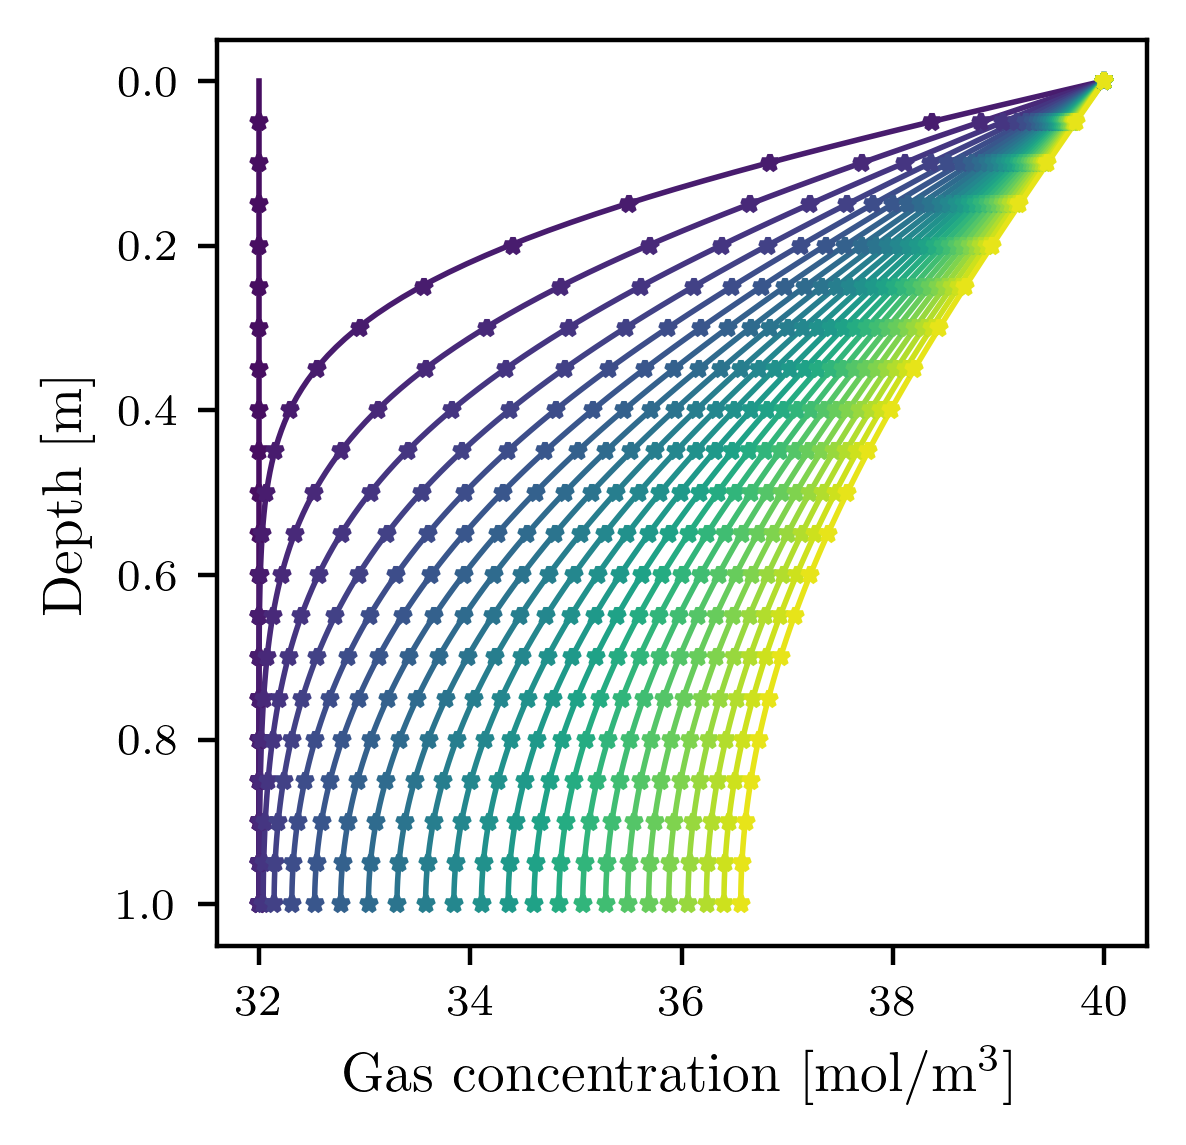

In [22]:
#define a color palette the size of the maximum dataset
palette = sns.color_palette("viridis", max(len(snapshot_times), len(ADSIM_DATA)))

#define plot size
width= 83 * 0.0393701 #in mm to inches
AR= 0.6  # aspect ratio height/width
height= width * AR  # in in

gf.PlotAll(OB_DATA, snapshot_times, 'C', 'Position (m)', palete=palette, legendMode=False, hold=1, xlabel=r'Gas concentration [mol/m$^3$]', ylabel='Depth [m]')

gf.PlotAll(ADSIM_DATA, IDs, 'CO2_Concentration', 'arc_length', palete=palette, legendMode=False, hold=1, xlabel=r'Gas concentration [mol/m$^3$]', ylabel='Depth [m]', mode='*', makersize=3, sample_span=50, linewith=1, xsize=width, ysize=height)

#invert y axis
plt.gca().invert_yaxis()